<a href="https://colab.research.google.com/github/VictorUceda/TrackNet-Padel/blob/main/MMPose_video_padel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMPose Install


In [ ]:
# clone mmpose repo
#%rm -rf mmpose
#!git clone https://github.com/open-mmlab/mmpose.git

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


import os 
# path = '/content/gdrive/MyDrive/Colab Notebooks/TrackNetv2/3_in_3_out'
path = '/content/gdrive/MyDrive/Colab Notebooks/'
os.chdir(path)
!pwd

!pip install ipython-autotime
%load_ext autotime

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks
time: 1.99 ms (started: 2022-05-07 10:23:49 +00:00)


In [2]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
%pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
%pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# install mmdet for inference demo
%pip install mmdet
%pip install mmpose
%pip install mmtrack

%cd mmpose
!pwd

# install mmpose dependencies
#%pip install -r requirements.txt

# install mmpose in develop mode
#%pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.4 MB/s eta 0:15:08tcmalloc: large alloc 1147494400 bytes == 0x393a4000 @  0x7fe60d506615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████▉                | 1055.7 MB 1.4 MB/s eta 0:12:40tcmalloc: large alloc 1434370048 bytes == 0x7d9fa000 @  0x7fe60d506615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████            | 1336.2 MB 1.6 MB/s eta 0:08:25tcmalloc: large alloc 1792966656 bytes =

## Inference with an MMPose model

MMPose provides high level APIs for model inference and training.

In [3]:
from google.colab import files


from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector
local_runtime = False

try:
  from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
  local_runtime = True

pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
det_model = init_detector(det_config, det_checkpoint)

load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


  0%|          | 0.00/243M [00:00<?, ?B/s]

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

time: 2min 10s (started: 2022-04-26 15:05:51 +00:00)


[{'bbox': array([212.97432  , 294.69965  , 269.25256  , 458.2747   ,   0.9974136],
      dtype=float32)}, {'bbox': array([235.19295  , 127.4939   , 277.00427  , 226.90639  ,   0.9968671],
      dtype=float32)}, {'bbox': array([589.03265  , 139.12407  , 633.23096  , 235.341    ,   0.9961649],
      dtype=float32)}, {'bbox': array([559.8368    , 354.96274   , 618.04517   , 518.7331    ,
         0.99265736], dtype=float32)}, {'bbox': array([6.9445593e+02, 1.2139591e+02, 7.2740308e+02, 1.8724173e+02,
       6.8636692e-01], dtype=float32)}, {'bbox': array([5.7221753e+02, 6.9788086e+01, 6.0091949e+02, 9.3113403e+01,
       3.2004911e-01], dtype=float32)}, {'bbox': array([5.7231635e+02, 6.8611900e+01, 6.0179126e+02, 1.3410864e+02,
       1.5385638e-01], dtype=float32)}]


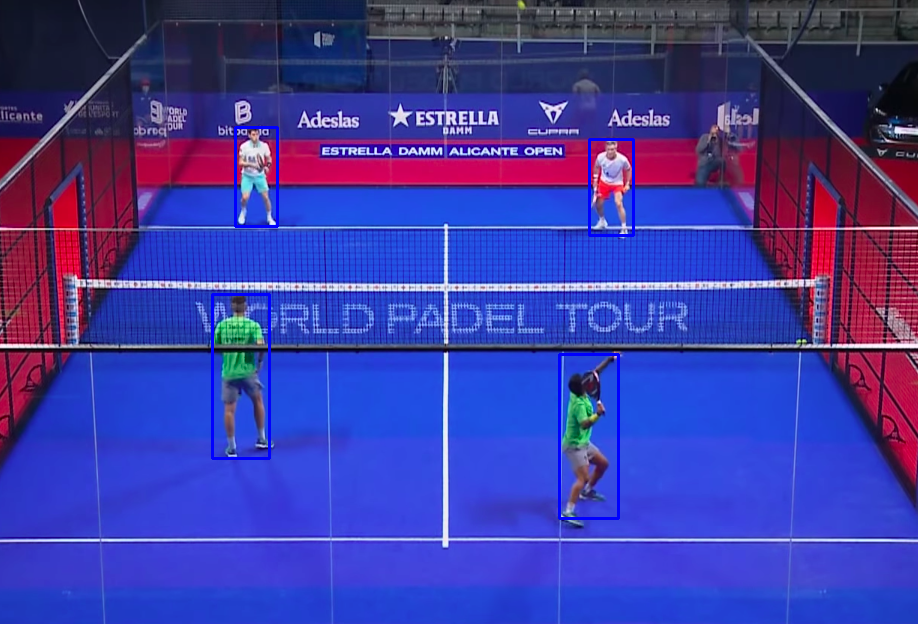

time: 1.38 s (started: 2022-04-22 16:28:54 +00:00)


In [ ]:
import cv2


img = 'Captura de pantalla 2022-04-20 a las 21.23.47.png'#'tests/data/coco/000000196141.jpg'

# inference detection
mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=1)
print(person_results)
# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(pose_model,
                                                               img,
                                                               person_results,
                                                               bbox_thr=0.3,
                                                               format='xyxy',
                                                               dataset=pose_model.cfg.data.test.type)

#print(pose_results)
image = cv2.imread(img)
for p in person_results:
  if p['bbox'][-1] > 0.7:
    image = cv2.rectangle(image, (p['bbox'][0], p['bbox'][1]), (p['bbox'][2], p['bbox'][3]), (255,0,0), 2)

cv2_imshow(image)

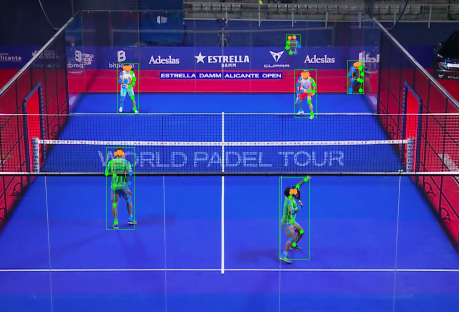

time: 95 ms (started: 2022-04-21 20:16:52 +00:00)


In [ ]:
# show pose estimation results
vis_result = vis_pose_result(pose_model,
                             img,
                             pose_results,
                             dataset=pose_model.cfg.data.test.type,
                             show=False)
# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

if local_runtime:
  from IPython.display import Image, display
  import tempfile
  import os.path as osp
  with tempfile.TemporaryDirectory() as tmpdir:
    file_name = osp.join(tmpdir, 'pose_results.png')
    cv2.imwrite(file_name, vis_result)
    display(Image(file_name))
else:
  cv2_imshow(vis_result)

In [ ]:
files.upload()
!ls

Saving Captura de pantalla 2022-04-20 a las 21.23.47.png to Captura de pantalla 2022-04-20 a las 21.23.47.png
'Captura de pantalla 2022-04-20 a las 21.23.47.png'
'Copia de padel_track_v2.ipynb'
 mmpose
 MMPose_video_padel.ipynb
 tennis-tracking
 TrackNet
 TrackNet-Badminton-Tracking-tensorflow2
 TrackNet_Padel.ipynb
 TrackNetv2
 TrackNet_v2_Padel.ipynb
time: 18.7 s (started: 2022-04-21 20:16:03 +00:00)


## Demo video with MMPose

In [ ]:
!python demo/top_down_pose_tracking_demo_with_mmdet.py \
    demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py \
    https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
    configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/res50_coco_256x192.py \
    https://download.openmmlab.com/mmpose/top_down/resnet/res50_coco_256x192-ec54d7f3_20200709.pth \
    --video-path ../tennis-tracking/VideoInput/golpes_TCTS.mp4 \
    --out-video-root vis_results

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/resnet/res50_coco_256x192-ec54d7f3_20200709.pth
Downloading: "https://download.openmmlab.com/mmpose/top_down/resnet/res50_coco_256x192-ec54d7f3_20200709.pth" to /root/.cache/torch/hub/checkpoints/res50_coco_256x192-ec54d7f3_20200709.pth
100% 130M/130M [00:17<00:00, 7.85MB/s]
time: 54.8 s (started: 2022-04-22 16:29:29 +00:00)


In [ ]:
!python demo/bottom_up_pose_tracking_demo.py \
    configs/body/2d_kpt_sview_rgb_img/associative_embedding/coco/hrnet_w32_coco_512x512.py \
    https://download.openmmlab.com/mmpose/bottom_up/hrnet_w32_coco_512x512-bcb8c247_20200816.pth \
    --video-path ../tennis-tracking/VideoInput/golpes_TCTS.mp4 \
    --out-video-root vis_results

load checkpoint from http path: https://download.openmmlab.com/mmpose/bottom_up/hrnet_w32_coco_512x512-bcb8c247_20200816.pth
Downloading: "https://download.openmmlab.com/mmpose/bottom_up/hrnet_w32_coco_512x512-bcb8c247_20200816.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32_coco_512x512-bcb8c247_20200816.pth
100% 109M/109M [00:12<00:00, 9.22MB/s]
/content/gdrive/MyDrive/Colab Notebooks/mmpose/mmpose/core/post_processing/group.py:232: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y = ind // W
time: 4min 13s (started: 2022-04-21 20:23:57 +00:00)


In [ ]:
!python demo/top_down_pose_tracking_demo_with_mmtracking.py \
    demo/mmtracking_cfg/tracktor_faster-rcnn_r50_fpn_4e_mot17-private.py \
    configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/res50_coco_256x192.py \
    https://download.openmmlab.com/mmpose/top_down/resnet/res50_coco_256x192-ec54d7f3_20200709.pth \
    --video-path ../tennis-tracking/VideoInput/golpes_TCTS.mp4 \
    --out-video-root vis_results

In [ ]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/mmpose
time: 114 ms (started: 2022-04-22 16:17:29 +00:00)


In [3]:
input_name = 'Final_PremierQatar_Tie'#'punto_qatar'
path = '/content/gdrive/MyDrive/PadelData/'

time: 1.79 ms (started: 2022-05-07 10:53:01 +00:00)


In [ ]:
!python demo/Padel_top_down_pose_tracking_demo_with_mmdet.py \
    demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py \
    https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
    configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/res50_coco_256x192.py \
    https://download.openmmlab.com/mmpose/top_down/resnet/res50_coco_256x192-ec54d7f3_20200709.pth \
    --video-path {path+input_name+'.mp4'} \
    --out-video-root {path} \
    --segments {path+'fragmentos.csv'}

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
 39% 62.6M/160M [00:08<00:11, 9.23MB/s]

In [25]:
#!mv {path+input_name+'.mp4.playersbox'} {path+input_name+'.playersbox'}

time: 189 ms (started: 2022-04-26 15:44:41 +00:00)
